# Machine Learning for Vertebral Column Data Set

### This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classiﬁcation task NO=0 and AB=1.

#### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [1]:
#question(a)
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = open('.../column_2C.dat').readlines()
data = [i.split() for i in data]

columns_name = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
                'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class']
df = pd.DataFrame(columns = columns_name, data = data)
df.loc[df['class'] == 'NO', ['class']] = 0
df.loc[df['class'] == 'AB',['class']] = 1
df.to_csv('.../column_2C.csv', index = False)

#### (b) Pre-Processing and Exploratory data analysis:
####     i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

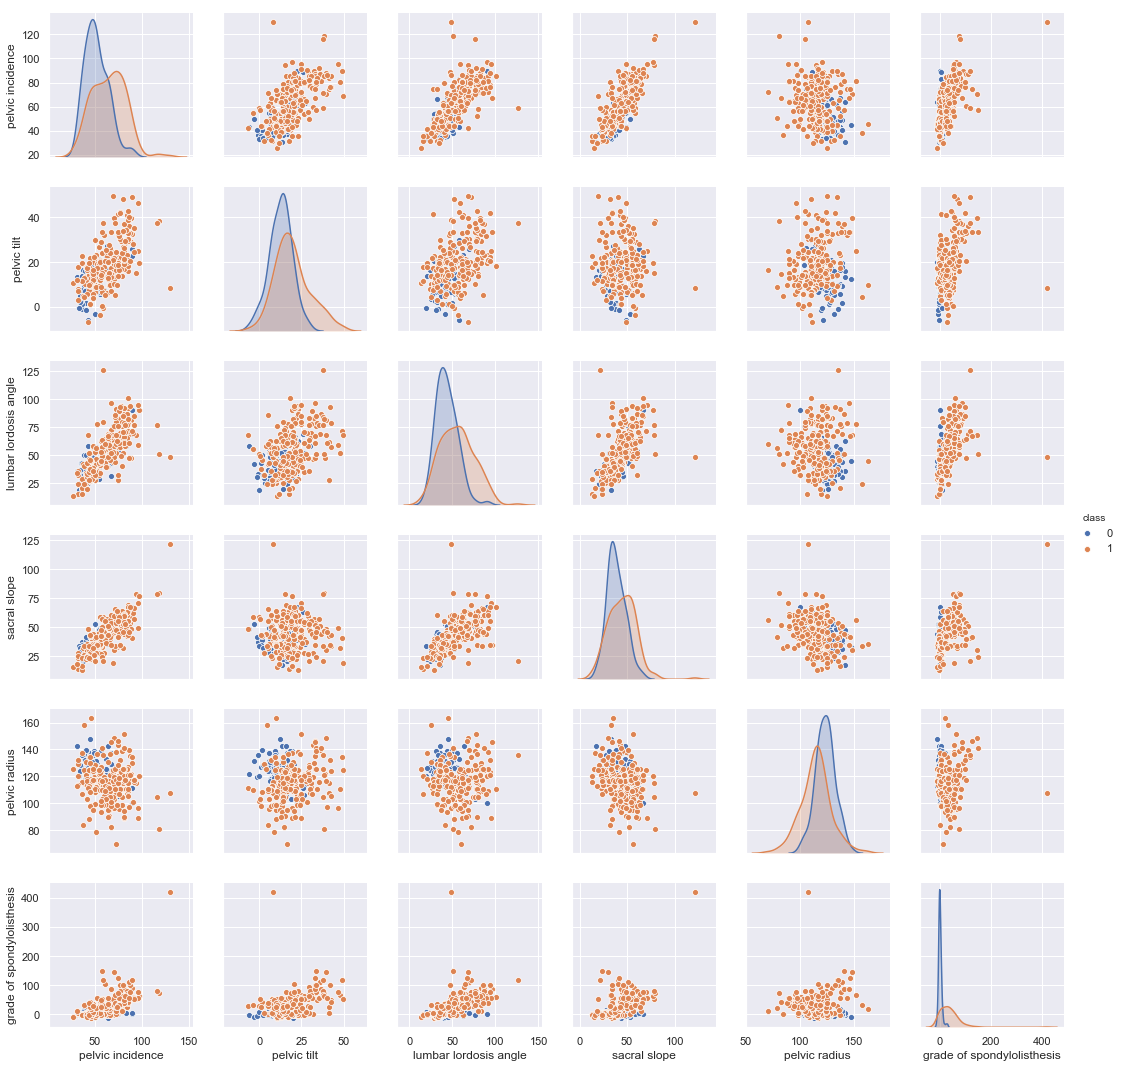

In [3]:
#question(b)1
CVdata =pd.read_csv('/Users/chenshengjie/Desktop/INF552/vertebral_column_data/column_2C.csv')
sns.set()
sns.pairplot(CVdata, hue = 'class',vars=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'])
plt.show()

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

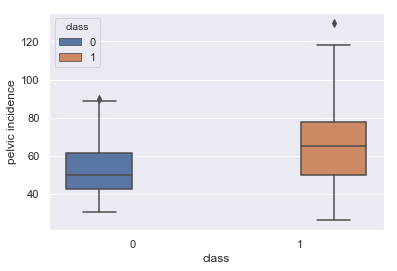

In [4]:
#question(b)2
sns.boxplot(x = 'class', y = 'pelvic incidence', data = CVdata, hue = 'class')

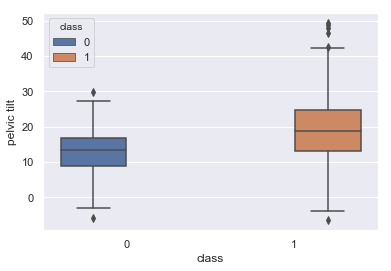

In [5]:
sns.boxplot(x = 'class', y = 'pelvic tilt', data = CVdata, hue = 'class')

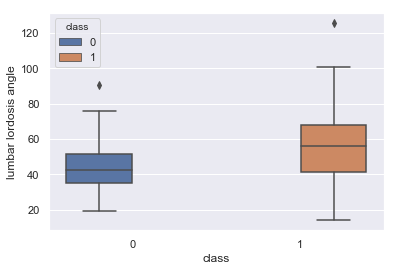

In [6]:
sns.boxplot(x = 'class', y = 'lumbar lordosis angle', data = CVdata, hue = 'class')

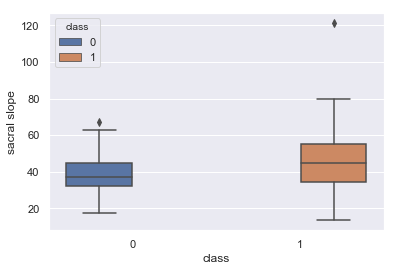

In [7]:
sns.boxplot(x = 'class', y = 'sacral slope', data = CVdata, hue = 'class')

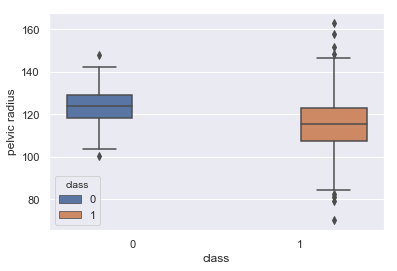

In [8]:
sns.boxplot(x = 'class', y = 'pelvic radius', data = CVdata, hue = 'class')

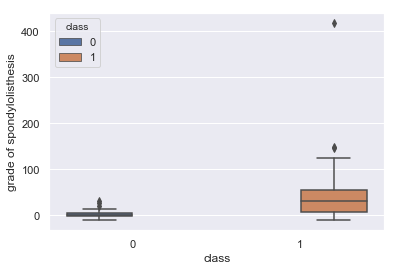

In [9]:
sns.boxplot(x = 'class', y = 'grade of spondylolisthesis', data = CVdata, hue = 'class')

#### iii. Select the ﬁrst 70 rows of Class 0 and the ﬁrst 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [10]:
#question(b)3
dfAB = df[df['class'] == 1]
dfNO = df[df['class'] == 0]

In [11]:
dfNO.to_csv('.../column_2CNO.csv', index = False)
dfAB.to_csv('.../column_2CAB.csv', index = False)
dfNO = pd.read_csv('.../column_2CNO.csv')
dfAB = pd.read_csv('.../column_2CAB.csv')

In [12]:
rows = dfAB.iloc[:, 0].size
dfABtrain = dfAB.head(140)
dfABtest = dfAB.tail(rows-140)
rows2 = dfNO.iloc[:, 0].size
dfNOtrain = dfNO.head(70)
dfNOtest = dfNO.tail(rows2-70)
frames1 = [dfABtest,dfNOtest]
dftest = pd.concat(frames1)
dftest = dftest.reset_index(drop=True)
frames2 = [dfABtrain,dfNOtrain]
dftrain = pd.concat(frames2)
dftrain = dftrain.reset_index(drop=True)

#### (c) Classiﬁcation using KNN on Vertebral Column Data Set
#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [13]:
#question(c)1
from sklearn.neighbors import KNeighborsClassifier
dftrain.to_csv('.../column_train.csv', index = False)
dftest.to_csv('.../column_test.csv', index = False)
dftrain = pd.read_csv('.../column_train.csv')
dftest = pd.read_csv('.../column_test.csv')

In [14]:
df_x_train = dftrain[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
df_y_train = dftrain['class']
df_x_test = dftest[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
df_y_test = dftest['class']

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.

In [18]:
#question(c)2
k = 210
bestk = 0
bestscore = 0
while k > 0:
    knn = KNeighborsClassifier(n_neighbors= k, p=2)
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscore:
        bestscore = score
        bestk = k
    k = k - 1
print("bestk:")
print(bestk)
print("bestscore:")
print(bestscore)

bestk:
4
bestscore:
0.94


In [21]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors= 4, p=2)
knn.fit(df_x_train, df_y_train)
test_y_predict = knn.predict(df_x_test)
confusion = confusion_matrix(df_y_test,test_y_predict)
print("Confusion matrix:")
print(confusion)

Confusion matrix:
[[25  5]
 [ 1 69]]


In [22]:
from sklearn.metrics import classification_report
print("F-score + precision:")
print(classification_report(df_y_test,test_y_predict))

F-score + precision:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

   micro avg       0.94      0.94      0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [23]:
TPR = confusion[0,0] / (confusion[0,0]+confusion[0,1])
print("True postive rate:")
print(TPR)
TNR = confusion[1,1] / (confusion[1,0]+confusion[1,1])
print("True negative rate:")
print(TNR)

True postive rate:
0.8333333333333334
True negative rate:
0.9857142857142858


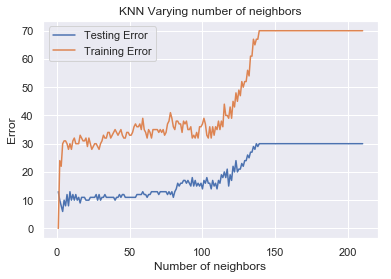

In [24]:
neighbors = np.arange(1,211)
train_error =np.empty(len(neighbors))
test_error = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(df_x_train, df_y_train)
    train_error[i] = (1 - knn.score(df_x_train, df_y_train, sample_weight = None))*210
    test_error[i] = (1 - knn.score(df_x_test, df_y_test, sample_weight = None))*100

plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_error, label='Testing Error')
plt.plot(neighbors, train_error, label='Training Error')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.show()

#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 3 Note: for each N, select your training set by choosing the ﬁrst bN/3c rows of Class 0 and the ﬁrst N − bN/3c rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

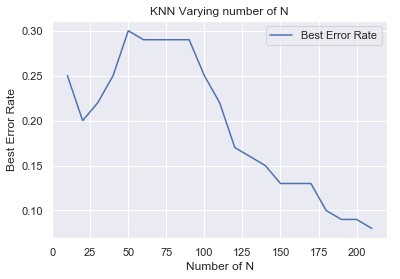

In [25]:
#question(c)3
neighbors = np.arange(0,21)
N2 = 10
best_error_rate = np.empty(len(neighbors))
i = 0
while N2 <= 210:
    k2 = 1
    dfABtrain2 = dfAB.head(N2 - int(N2 / 3))
    dfNOtrain2 = dfNO.head(int(N2 / 3))
    frames2 = [dfABtrain2,dfNOtrain2]
    dftrain2 = pd.concat(frames2)
    df_x_train2 = dftrain2[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']]
    df_y_train2 = dftrain2['class']
    bestk2 = 0
    bestscore2 = 0
    while k2 < N2:
        knn = KNeighborsClassifier(n_neighbors= k2, p=2)
        knn.fit(df_x_train2, df_y_train2)
        score2=knn.score(df_x_test,df_y_test,sample_weight=None)
        if score2 > bestscore2:
            bestscore2 = score2
            bestk2 = k2
        k2 = k2 + 5
    best_error_rate[i] = 1 - bestscore2
    i = i + 1
    N2 = N2 + 10

plt.title('KNN Varying number of N')
plt.plot(neighbors * 10 + 10, best_error_rate, label='Best Error Rate')
plt.legend()
plt.xlabel('Number of N')
plt.ylabel('Best Error Rate')
plt.show()

#### Let us further explore some variants of KNN.
#### (d) Replace the Euclidean metric with the following metrics 4 and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
#### i. Minkowski Distance:
#### A. which becomes Manhattan Distance with p = 1.

In [27]:
#d(1)
k = 1
bestscoredA = 0
bestkdA = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1)
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoredA:
        bestscoredA = score
        bestkdA = k
    k = k + 5
print("bestscoredA:")
print(bestscoredA)
print("bestkdA:")
print(bestkdA)

bestscoredA:
0.89
bestkdA:
6


#### B. with log 10 (p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 (p)?

In [28]:
bestscoredB = 0
besti = 0
i = 0.1
while i <= 1:
    knn = KNeighborsClassifier(n_neighbors= 6, metric = 'minkowski', p=pow(10,i))
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoredB:
        bestscoredB = score
        besti = i
    i = i + 0.1
print("bestscoredB:")
print(bestscoredB)
print("besti:")
print(besti)

bestscoredB:
0.94
besti:
0.6


#### C. which becomes Chebyshev Distance with p → ∞

In [29]:
k = 1
bestscoredC = 0
bestkdC = 1
i = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'))
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoredC:
        bestscoredC = score
        bestkdC = k
    i = i + 1
    k = k + 5
print("bestscoredC:")
print(bestscoredC)
print("bestkdC:")
print(bestkdC)

bestscoredC:
0.92
bestkdC:
16


#### ii. Mahalanobis Distance.

In [31]:
k = 1
bestscoredD = 0
bestkdD = 1
i = 0
S = df_x_train.cov()
SI = np.linalg.pinv(S)
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'mahalanobis',metric_params={'V': SI})
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoredD:
        bestscoredD = score
        bestkdD = k
    i = i + 1
    k = k + 5
print("bestscoredD:")
print(bestscoredD)
print("bestkdD:")
print(bestkdD)

bestscoredD:
0.92
bestkdD:
6


In [34]:
datad = {'DistanceName':['Manhattan','Chebyshev','Mahalanobis'],'BestK':[bestkdA,bestkdC,bestkdD],'TestErrors':[(1-bestscoredA)*100,(1-bestscoredC)*100,(1-bestscoredD)*100]}
resulttabled = pd.DataFrame(datad)
resulttabled

,BestK,DistanceName,TestErrors
0,6,Manhattan,11.0
1,16,Chebyshev,8.0
2,6,Mahalanobis,8.0


#### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [35]:
#question(e)
k = 1
bestscoree1 = 0
bestke1 = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=2, weights = 'distance')
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoree1:
        bestscoree1 = score
        bestke1 = k
    k = k + 5
print("bestscoree1:")
print(bestscoree1)
print("bestke1:")
print(bestke1)

bestscoree1:
0.9
bestke1:
6


In [36]:
k = 1
bestscoree2 = 0
bestke2 = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1, weights = 'distance')
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoree2:
        bestscoree2 = score
        bestke2 = k
    k = k + 5
print("bestscoree2:")
print(bestscoree2)
print("bestke2:")
print(bestke2)

bestscoree2:
0.9
bestke2:
26


In [37]:
k = 1
bestscoree3 = 0
bestke3 = 1
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'), weights = 'distance')
    knn.fit(df_x_train, df_y_train)
    test_y_predict = knn.predict(df_x_test)
    score=knn.score(df_x_test,df_y_test,sample_weight=None)
    if score > bestscoree3:
        bestscoree3 = score
        bestke3 = k
    k = k + 5
print("bestscoree3:")
print(bestscoree3)
print("bestke3:")
print(bestke3)

bestscoree3:
0.89
bestke3:
16


In [38]:
datae = {'DistanceName':['Euclidean','Manhattan','Chebyshev'],'BestK':[bestke1,bestke2,bestke3],'TestErrors':[(1-bestscoree1)*100,(1-bestscoree2)*100,(1-bestscoree3)*100]}
resulttablee = pd.DataFrame(datae)
resulttablee

,BestK,DistanceName,TestErrors
0,6,Euclidean,10.0
1,26,Manhattan,10.0
2,16,Chebyshev,11.0
